In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [76]:
df = pd.DataFrame(data=dataset['data'],
                  columns=[
                      'age',
                      'sex',
                      'bmi',
                      'bp',
                      's1',
                      's2',
                      's3',
                      's4',
                      's5',
                      's6'
                  ])
df['target'] = dataset['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [78]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import warnings

params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4],
    'max_features': [1, 2, 3, 5, 7, 10]
}

model = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    refit=True
)
warnings.filterwarnings('ignore')
model.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': [1, 2, ...], 'splitter': ['best', 'random']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation ti

In [79]:
model_param = model.best_params_
print(model_param)

{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 10, 'splitter': 'random'}


[Text(0.5, 0.875, 'x[8] <= 0.006\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[8] <= -0.023\nfriedman_mse = 3569.551\nsamples = 170\nvalue = 117.429'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= -0.0\nfriedman_mse = 2611.283\nsamples = 102\nvalue = 106.245'),
 Text(0.0625, 0.125, 'friedman_mse = 2024.869\nsamples = 76\nvalue = 98.303'),
 Text(0.1875, 0.125, 'friedman_mse = 3602.018\nsamples = 26\nvalue = 129.462'),
 Text(0.375, 0.375, 'x[2] <= -0.017\nfriedman_mse = 4537.869\nsamples = 68\nvalue = 134.206'),
 Text(0.3125, 0.125, 'friedman_mse = 2323.556\nsamples = 36\nvalue = 114.667'),
 Text(0.4375, 0.125, 'friedman_mse = 6116.277\nsamples = 32\nvalue = 156.188'),
 Text(0.75, 0.625, 'x[3] <= 0.07\nfriedman_mse = 5043.814\nsamples = 139\nvalue = 195.921'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= -0.02\nfriedman_mse = 4720.554\nsamples = 121\nvalue = 189.223'),
 Text(0.5625, 0.125, 'friedman_mse = 3814.548\nsamples 

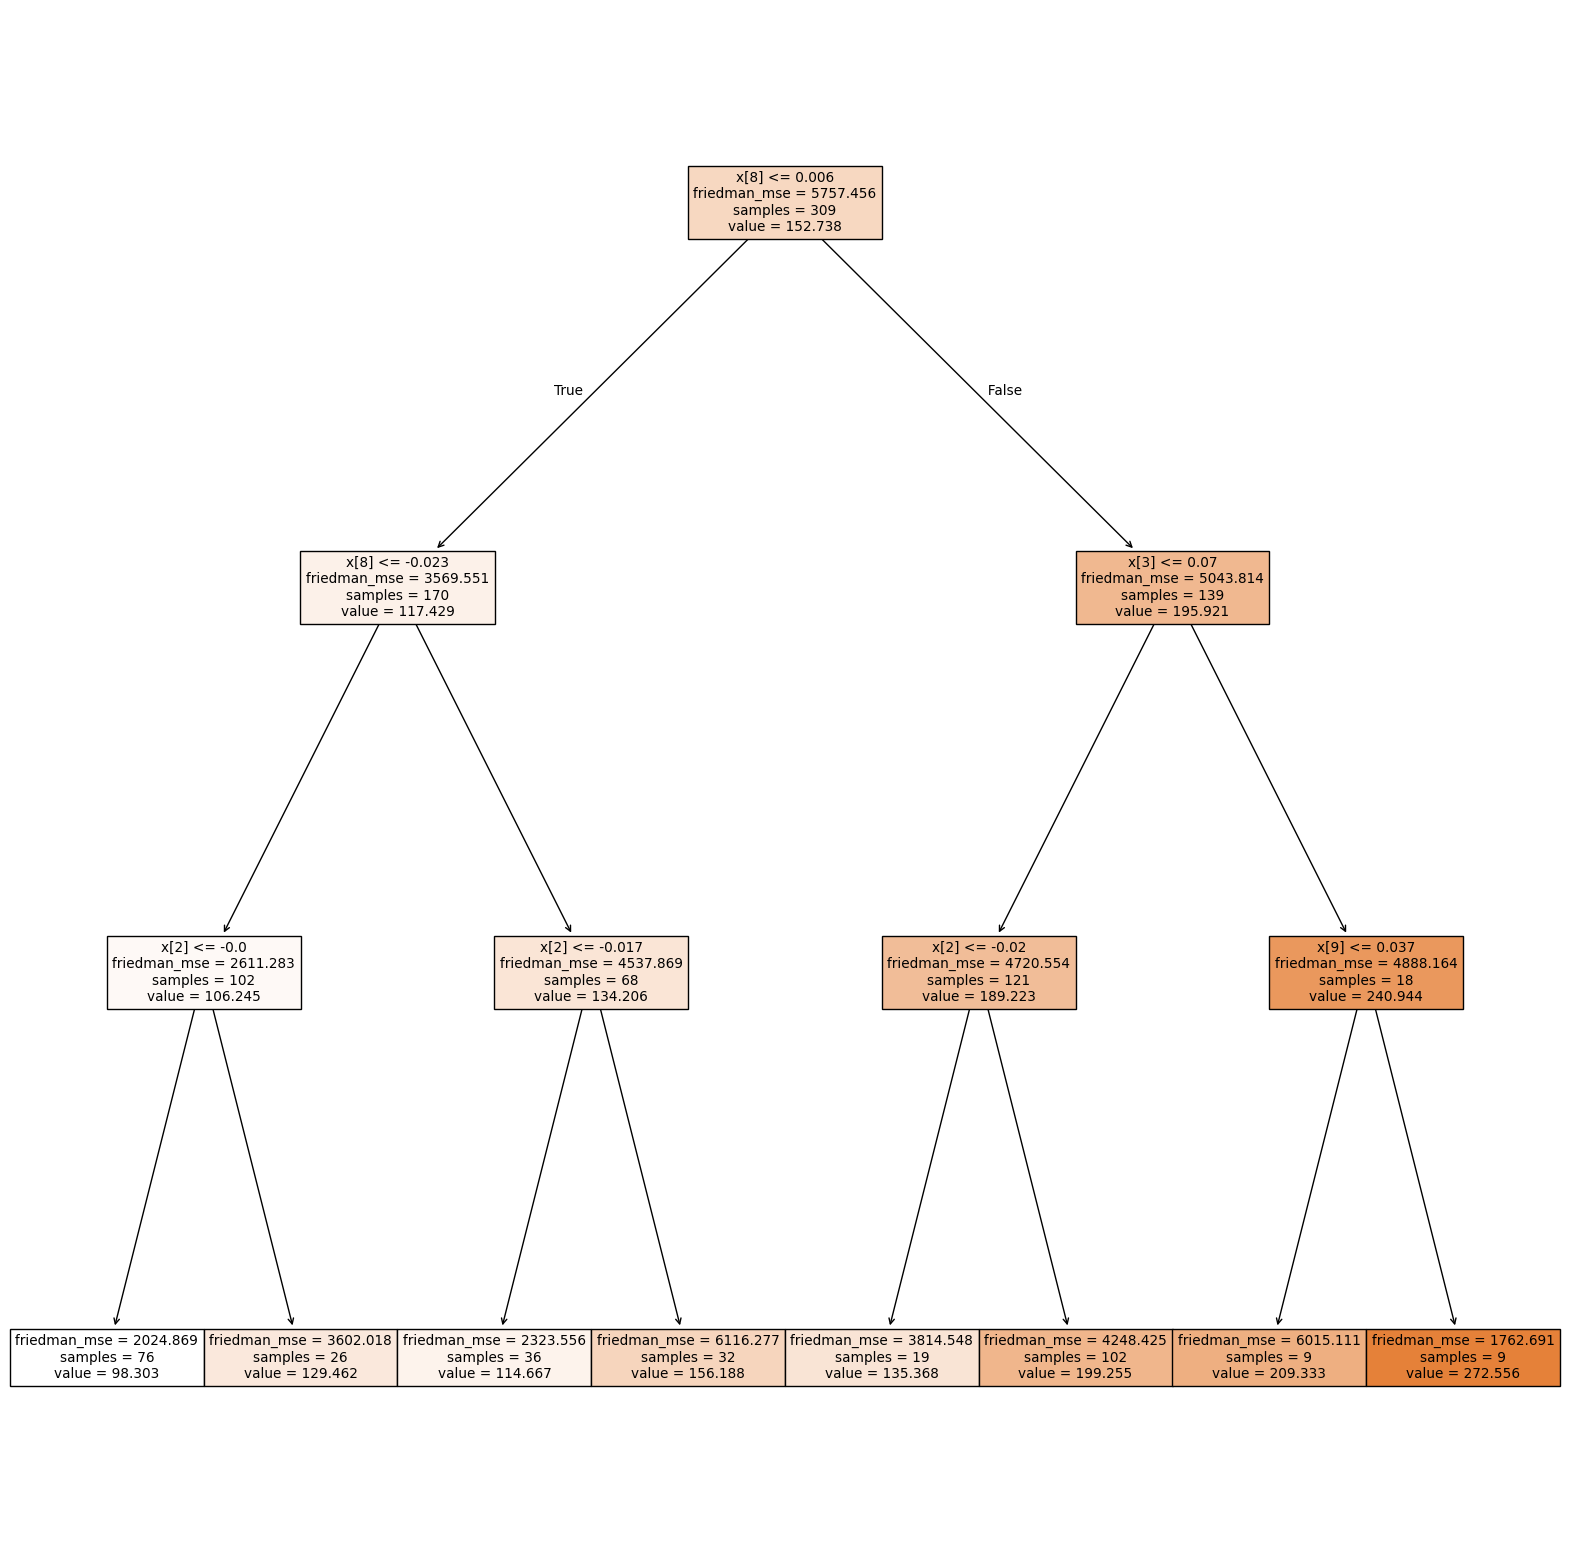

In [80]:
plt.figure(figsize=(20, 20))
tree = DecisionTreeRegressor(**model_param)
tree.fit(X_train, y_train)
plot_tree(decision_tree=tree, filled=True)

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f"R2 Score: {r2_score(y_test, tree.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, tree.predict(X_test))}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, tree.predict(X_test)))}")

R2 Score: 0.44152692631383317
MSE: 3533.833925716969
RMSE: 59.4460589586641
